In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리
기술통계19 global_id 와 실태조사_업종 (서비스, 일반, 제조)의 global_id의 교집합 만을 추출

In [162]:
train = pd.read_csv('기술통계19.csv',index_col='global_id')

In [163]:
service = pd.read_csv('실태조사_서비스업19.csv',index_col='global_id')
normal = pd.read_csv('실태조사_일반항목19.csv',index_col='global_id')
product = pd.read_csv('실태조사_제조업19.csv',index_col='global_id')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (54,84,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
line=[]
for i in train.index:
    line.append(i)
    if not i in service.index:
        line.remove(i)

In [166]:
line=[]
for i in train.index:
    if i in service.index:
        line.append(i)
    else:
        line.append(0)

service_train =train[train.index == line]

service_train['bt'] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [167]:
line2=[]
for i in train.index:
    if i in normal.index:
        line2.append(i)
    else:
        line2.append(0)
        
normal_train =train[train.index == line2]

normal_train['bt'] = 2

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [168]:
line3=[]
for i in train.index:
    if i in product.index:
        line3.append(i)
    else:
        line3.append(0)
        
product_train =train[train.index == line3]

product_train['bt'] = 3

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [169]:
train = pd.concat([service_train, normal_train, product_train])

# Feature Engineering

## 변수 추출

In [170]:
features = ['A1S1','A1N1','C2S2','H1_1','H4_1','I4Q1','I4Q2','I4Q3','I4Q4','I4Q5','I4Q6','I4Q7']

In [171]:
train = train[features]

'H3_1' 결측치 많아서 뺌

## 결측치 최빈값 대체
다른 좋은 방법있으면 그걸로 하기

In [172]:
from sklearn.preprocessing import Imputer

In [173]:
imputer = Imputer(missing_values='NaN',strategy='most_frequent')
bin_features=[
'H1_1','H4_1']
# train[bin_features]=train[bin_features].fillna(train[bin_features].mode())
train[bin_features] = imputer.fit_transform(train[bin_features].values)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 변수 라벨링

In [174]:
train.isnull().sum()

A1S1    0
A1N1    0
C2S2    0
H1_1    0
H4_1    0
I4Q1    0
I4Q2    0
I4Q3    0
I4Q4    0
I4Q5    0
I4Q6    0
I4Q7    0
dtype: int64

In [175]:
train=train.astype('float')

In [176]:
train['A1S1']=train['A1S1'].replace({1:1,2:1,3:2,4:3,5:3,
                                        6:1,7:4})
train['A1N1']=train['A1N1'].replace({1:1,2:1,3:4,4:3,5:3,
                                        6:3,7:4,8:3,9:3,10:2,11:2,12:3,13:5,14:5,15:5})
train['C2S2']=train['C2S2'].replace({1:1,2:2,3:3,4:2})
train['H1_1']=train['H1_1'].replace({1:3,2:1,3:1,4:2,5:2,6:2,7:2,8:4,9:4})
train['H4_1']=train['H4_1'].replace({1:1,2:4,3:1,4:2,5:3,6:3,7:5,8:6,9:5,10:6})
train['I4Q1']=train['I4Q1'].replace({1:3,2:2,3:1,4:1,5:1})
train['I4Q2']=train['I4Q2'].replace({1:3,2:2,3:1,4:1,5:1})
train['I4Q3']=train['I4Q3'].replace({1:3,2:2,3:1,4:1,5:1})
train['I4Q4']=train['I4Q4'].replace({1:3,2:2,3:1,4:1,5:1})
train['I4Q5']=train['I4Q5'].replace({1:3,2:2,3:1,4:1,5:1})
train['I4Q6']=train['I4Q6'].replace({1:3,2:2,3:1,4:1,5:1})
train['I4Q7']=train['I4Q7'].replace({1:3,2:2,3:1,4:1,5:1})

# PCA + GMM
클러스터링의 이해도를 높이기 위해, 시각화를 위해

In [178]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

PCA의 제일 적합한 차원 수

In [179]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(train)

print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)
print('explained variance ratio :', pca.explained_variance_ratio_)

singular value : [60.72594898 38.6243482  35.56512626]
singular vector :
 [[-0.01100503  0.13188056  0.41624776]
 [ 0.01402137  0.02891458  0.87639241]
 [-0.05227526  0.00597111  0.06120023]
 [ 0.04662371  0.08468804 -0.08926732]
 [ 0.06458271  0.96819814 -0.10696479]
 [ 0.39676671  0.05556465  0.08230673]
 [ 0.37100251  0.0756136   0.09303843]
 [ 0.35755923  0.0209017   0.04916433]
 [ 0.4109623  -0.06713898 -0.08890749]
 [ 0.37219085 -0.11028963 -0.09797433]
 [ 0.36339206 -0.07844095 -0.01285579]
 [ 0.35807789 -0.07134395 -0.0014434 ]]
explained variance ratio : [0.35642749 0.14419324 0.12225631]


In [180]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 1


pca의 시각화를 위해 n_componets=2 (2차원)으로 선택

In [181]:
pca = PCA(n_components=2).fit(train) #2개로 진행해봄
pca_train = pca.transform(train)

PCA 후 GMM

In [182]:
pca_train

array([[-0.28380171, -0.96117894],
       [-1.02818341, -0.74059967],
       [-0.84413789,  3.40192511],
       ...,
       [ 0.46111244, -0.15068179],
       [ 2.41692154, -0.90462976],
       [-2.16618123, -0.51468234]])

pca된 자료 분포 확인

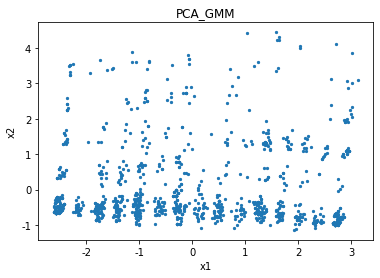

In [183]:
plt.scatter(pca_train[:, 0], pca_train[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("PCA_GMM")
plt.show()

In [244]:
# def plot_gaussianmixture(n):
#     model = GMM(n_components=3,max_iter=n)
#     with ignore_warnings(category=ConvergenceWarning):
#         model.fit(pca_train)
#     pi = model.predict_proba(pca_train)
#     plt.scatter(pca_train[:, 0], pca_train[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
#     plt.title("iteration: {}".format(n))

In [245]:
# plt.figure(figsize=(8, 12))
# plt.subplot(411)
# plot_gaussianmixture(1)
# plt.subplot(412)
# plot_gaussianmixture(5)
# plt.subplot(413)
# plot_gaussianmixture(10)
# plt.subplot(414)
# plot_gaussianmixture(15)
# plt.tight_layout()
# plt.show()

GMM 모델 (그룹 3개)

In [186]:
pca_gmm = GMM(n_components=3).fit(pca_train)
pca_gmm_predict=pca_gmm.predict(pca_train)
print(pca_gmm_predict)

[1 1 0 ... 0 2 1]


GMM 모델 분포 확인

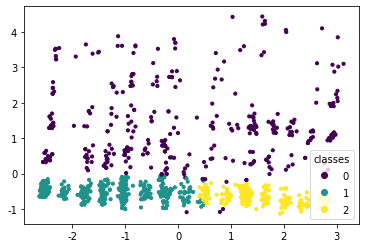

In [187]:
fig, ax = plt.subplots()
scatter= ax.scatter(pca_train[:,0],pca_train[:,1],
           c=pca_gmm_predict, marker ='o',s=10)
ax.legend(*scatter.legend_elements(),
          loc = 'lower right', title = 'classes')

In [234]:
train['pca_gmm_cluster'] = pca_gmm_predict

# train.to_csv('pca_gmmcluster.csv',index=False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# PCA + AgglomerativeClustering

In [189]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, ward
from sklearn.cluster import AgglomerativeClustering
import mglearn
import matplotlib
import numpy as np
from pandas.plotting import parallel_coordinates

In [190]:
pca_agg = AgglomerativeClustering(n_clusters=3) #3개 클래스로 분류
pca_agg_predict = pca_agg.fit_predict(pca_train)

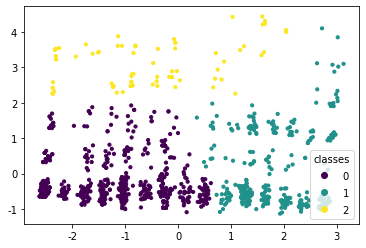

In [191]:
fig, ax = plt.subplots()
scatter= ax.scatter(pca_train[:,0],pca_train[:,1],
           c=pca_agg_predict, marker ='o',s=10)
ax.legend(*scatter.legend_elements(),
          loc = 'lower right', title = 'classes')

In [241]:
train['pca_agg_cluster'] = pca_agg_predict

# train.to_csv('pca_agg_cluster.csv',index=False)

# Gaussian Mixture Modeling
실수값을 출력하는 확률변수  X 가  K -클래스 카테고리 확률변수  Z 의 값에 따라 다른 기댓값과 분산을 가지는 복수의 가우시안 정규분포들로 이루어진 모형을 가우시안 혼합(Gaussian Mixture) 모형이라고 한다.

In [193]:
train1 = train[features]

3개의 그룹으로 분류

In [194]:
gmm = GMM(n_components=3).fit(train1)
gmm_predict=gmm.predict(train1)
print(gmm_predict)
# plt.scatter(train[:,0],train[:,1],c=labels,s=40,cmap='virdis')

[1 1 1 ... 1 2 1]


In [236]:
train['gmm_cluster'] = gmm_predict

In [196]:
# train.to_csv('gmmcluster.csv',index=False)

## 시각화

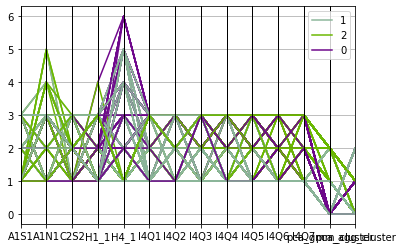

In [197]:
pd.plotting.parallel_coordinates(train, 'gmm_cluster')

# AgglomerativeClustering

In [198]:
train2 = train[features]

3개의 그룹으로 분류

In [200]:
model = AgglomerativeClustering(n_clusters=3)

In [201]:
model.fit(train2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [202]:
ac_predict = model.fit_predict(train2)
print(ac_predict)

[0 0 1 ... 0 0 2]


In [237]:
train['ac_cluster'] = ac_predict

In [204]:
# train.to_csv('AggCluster.csv',index=False)

# Dummy+PCA + GMM

In [211]:
train5 = train[features]

In [212]:
train5.columns

Index(['A1S1', 'A1N1', 'C2S2', 'H1_1', 'H4_1', 'I4Q1', 'I4Q2', 'I4Q3', 'I4Q4',
       'I4Q5', 'I4Q6', 'I4Q7'],
      dtype='object')

더미변수 생성

In [213]:
for i in features:
    dummies = pd.get_dummies(train5[i],prefix=i)
    train5 = pd.concat([train5,dummies],axis=1)

기존 변수 제거

In [214]:
train5 = train5.drop(columns=features)

In [215]:
pca = PCA(n_components=2).fit(train5) #2개로 진행
pca_train = pca.transform(train5)

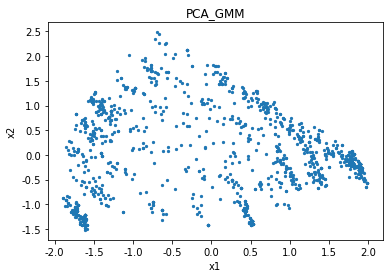

In [216]:
plt.scatter(pca_train[:, 0], pca_train[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("PCA_GMM")
plt.show()

In [217]:
# def plot_gaussianmixture(n):
#     model = AgglomerativeClustering(n_clusters=3)
#     with ignore_warnings(category=ConvergenceWarning):
#         model.fit(pca_train)
#     pi = model.predict_proba(pca_train)
#     plt.scatter(pca_train[:, 0], pca_train[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
#     plt.title("iteration: {}".format(n))

In [218]:
dummy_pca_gmm = GMM(n_components=3).fit(pca_train)
dummy_pca_gmm_predict=dummy_pca_gmm.predict(pca_train)
print(dummy_pca_gmm_predict)

[1 1 1 ... 1 0 1]


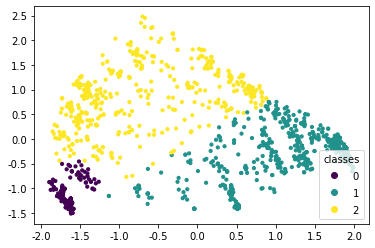

In [219]:
fig, ax = plt.subplots()
scatter= ax.scatter(pca_train[:,0],pca_train[:,1],
           c=dummy_pca_gmm_predict, marker ='o',s=10)
ax.legend(*scatter.legend_elements(),
          loc = 'lower right', title = 'classes')

0번 그룹이 상대적으로 적은 것을 볼 수 있음

In [238]:
train['dummy_pca_gmm'] = dummy_pca_gmm_predict
# train.to_csv('dummie_pca_gmm.csv',index=False)

# Dummy+PCA + AGG

In [221]:
train6 = train[features]

In [222]:
train6.columns

Index(['A1S1', 'A1N1', 'C2S2', 'H1_1', 'H4_1', 'I4Q1', 'I4Q2', 'I4Q3', 'I4Q4',
       'I4Q5', 'I4Q6', 'I4Q7'],
      dtype='object')

더미변수 생성

In [223]:
for i in features:
    dummies = pd.get_dummies(train6[i],prefix=i)
    train6 = pd.concat([train6,dummies],axis=1)

기존 변수 제거

In [224]:
train6 = train6.drop(columns=features)

In [225]:
pca = PCA(n_components=2).fit(train6) #2개로 진행해봄
pca_train = pca.transform(train6)

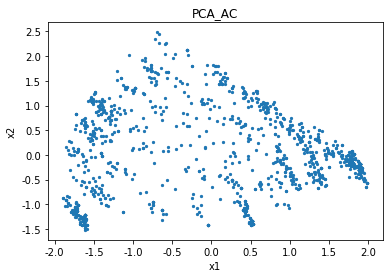

In [226]:
plt.scatter(pca_train[:, 0], pca_train[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("PCA_AC")
plt.show()

In [227]:
pca_agg = AgglomerativeClustering(n_clusters=3)
dummy_pca_agg_predict = pca_agg.fit_predict(pca_train)

print(dummy_pca_agg_predict)

[0 1 1 ... 0 0 1]


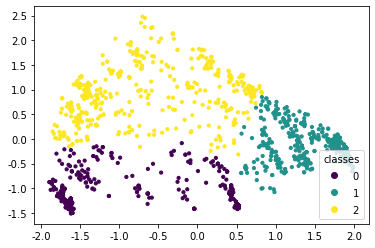

In [228]:
fig, ax = plt.subplots()
scatter= ax.scatter(pca_train[:,0],pca_train[:,1],
           c=dummy_pca_agg_predict, marker ='o',s=10)
ax.legend(*scatter.legend_elements(),
          loc = 'lower right', title = 'classes')

In [239]:
train['dummy_pca_agg'] = dummy_pca_agg_predict
# train.to_csv('dummy_pca_agg.csv',index=False)

In [243]:
train.to_csv('total.csv',index=False)